# Gradient Descent, Stochastic Gradient Descent and Mini Batch Gradient Descent

This notebook explains the three different approaches for the Gradient Descent Algorithm. These different models are based on a step size (learning rate as called in Machine Learning) and the direction in which the step size is going to be directed. (such as Hyperparameters)

## Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Initial Data

In [2]:
d = 100 #number of columns
n = 1000 #number of observations
X = np.random.normal(0, 1, size=(n,d))
beta_true = np.random.normal(0 ,1, size=(d,1))
y = X.dot(beta_true) + np.random.normal(0, 0.5, size=(n,1))

## 1. Closed Solution (CS)

### 1.1 Solution equation

$
\beta^{*} = (X^{T}X)^{-1} X^{T}Y
$

### 1.2 Function

In [3]:
def beta_cs(x_train, y_train):
    beta_cs = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), y)
    return(beta_cs)

### 1.3 Results

In [4]:
beta_cs = beta_cs(X, y)

print('The dimensions for beta in a closed solution are:', beta_cs.shape)
beta_cs[1:15]

The dimensions for beta in a closed solution are: (100, 1)


array([[ 0.03978489],
       [-1.33550689],
       [-0.26138078],
       [ 0.93310656],
       [-1.02887753],
       [-1.07869636],
       [-0.17956725],
       [ 0.24104654],
       [-0.71258782],
       [-0.9502783 ],
       [ 0.89695076],
       [-0.82964526],
       [ 0.07528218],
       [ 1.08193169]])

In [5]:
error_cs = np.sum((np.matmul(X, beta_cs) - y)**2)
print('The error for the closed solution is:', error_cs)

The error for the closed solution is: 233.18950323257644


## 2. Gradient Descent (Batch)

### 2.1 Batch Gradient Descent Equation

$
\beta_{k+1} = \beta_{k} - \alpha_{k} \frac{1}{m} \sum_{i=1}^{m} \nabla f_{i}(\beta_{k})
$

### 2.2 Function

In [6]:
def batch_gd(iterations, lr, x_train, y_train, beta, tolerance, k):
    
    #Parameters and transformations
    errors = []
    beta = beta.reshape(beta.shape[0],)
    y_train = y_train.reshape(y_train.shape[0],)
    
    #Start of iterations
    for epoch in range(iterations):
        gradient = 2*(np.matmul(x_train.T, np.matmul(x_train, beta) - y_train)) #x_train represents the whole batch
        beta = beta - ((lr/x_train.shape[0]) * gradient)
        
        error = np.sum((np.matmul(x_train, beta) - y_train)**2)
        
        #Append the error to the list of errors
        errors.append(error)
        
        #Display only iterations/k errors
        if epoch%k==0:
            print('Iteration', epoch+1, 'step size:', lr, 'error:', error)
        
        if error < tolerance:
            break

    print('Last iteration', epoch+1, 'step size:', lr, 'error:', errors[len(errors)-1])
    return(beta, errors)

### 2.3 Parameters of the model

In [7]:
iterations_gd = 2000
lr_gd = np.array([5e-5, 5e-4, 7e-4, 1e-1, 1e-2, 1e-3, 1e-4]) #with additional learning rates
b_gd = np.zeros((d,1))
tolerance_gd = error_cs #Using the error from the closed solution as tolerance
k_gd = 2000

### 2.4 Results

Iteration 1 step size: 5e-05 error: 87294.08487509373
Last iteration 2000 step size: 5e-05 error: 56051.6482779936
Iteration 1 step size: 0.0005 error: 87116.72566507086
Last iteration 2000 step size: 0.0005 error: 2230.71838787451
Iteration 1 step size: 0.0007 error: 87037.96203909276
Last iteration 2000 step size: 0.0007 error: 837.6717634682286
Iteration 1 step size: 0.1 error: 52696.399180600645
Last iteration 182 step size: 0.1 error: 233.1895032325764
Iteration 1 step size: 0.01 error: 83418.05823932105
Last iteration 1878 step size: 0.01 error: 233.1895032325764
Iteration 1 step size: 0.001 error: 86919.88893426521
Last iteration 2000 step size: 0.001 error: 352.36499867259124
Iteration 1 step size: 0.0001 error: 87274.36865165035
Last iteration 2000 step size: 0.0001 error: 36602.57150320842


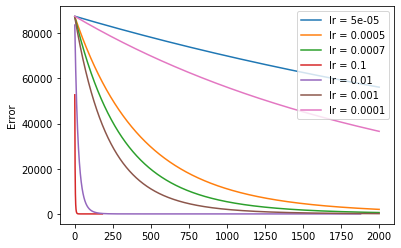

In [8]:
for step in lr_gd:
    beta_gd, errors_gd = batch_gd(
        iterations = iterations_gd, 
        lr = step, 
        x_train = X, 
        y_train = y, 
        beta = b_gd, 
        tolerance = tolerance_gd,
        k = k_gd
    )
    plt.plot(errors_gd, label = 'lr = ' + str(step))
    plt.legend()
    plt.ylabel('Error')

We can see that the best tested learning rate or step size for the algorithm is **0.1**. This result converges in 182 iterations to almost the same error as the closed solution.

## 3. Stochastic Gradient Descent

### 3.1 Stochastic Gradient Descent Equation

$
\beta_{k+1} = \beta_{k} - \alpha_{k} \nabla f_{i}(\beta_{k})
$

### 3.2 Function

In [9]:
def stochastic_gd(iterations, lr, x_train, y_train, beta, tolerance, k):
    
    #Parameters and transformations
    errors = []
    beta = beta.reshape(beta.shape[0],)
    y_train = y_train.reshape(y_train.shape[0],)
    
    #Start of iterations
    for epoch in range(iterations):
        for r in range(x_train.shape[0]):
            row = np.random.randint(0, x_train.shape[0])
            x_row = x_train[row,:].reshape(1,x_train.shape[1])
            y_row = y_train[row].reshape(1,1)

            gradient = 2*(np.matmul(x_row.T, np.matmul(x_row, beta) - y_row)) #Only one observation
            beta = beta - ((lr) * gradient.reshape(gradient.shape[0],))
        
        error = np.sum((np.matmul(x_train, beta) - y_train)**2)
        
        #Display only iterations/k errors
        if epoch%k==0:
            print('Iteration', epoch+1, 'step size:', lr, 'error:', error)
        
        if error < tolerance:
            break
        
        #Append the error to the list of errors
        errors.append(error)

    print('Last iteration', epoch+1, 'step size:', lr, 'error:', errors[len(errors)-1])
    return(beta, errors)

### 3.3 Parameters of the model

In [10]:
iterations_sgd = 1000
lr_sgd = np.array([5e-4, 5e-3, 1e-3, 1e-4]) #with additional learning rates
b_sgd = np.zeros((d,1))
tolerance_sgd = error_cs #Using the error from the closed solution as tolerance
k_sgd = 500

### 3.4 Results

Iteration 1 step size: 0.0005 error: 12570.934461768684
Iteration 501 step size: 0.0005 error: 246.23775689253605
Last iteration 1000 step size: 0.0005 error: 243.30312494767668
Iteration 1 step size: 0.005 error: 547.7526097811656
Iteration 501 step size: 0.005 error: 492.106651841396
Last iteration 1000 step size: 0.005 error: 490.3697938774308
Iteration 1 step size: 0.001 error: 2687.0384437178845
Iteration 501 step size: 0.001 error: 255.2134667185252
Last iteration 1000 step size: 0.001 error: 265.4228024132917
Iteration 1 step size: 0.0001 error: 55916.150926670016
Iteration 501 step size: 0.0001 error: 234.89292807327564
Last iteration 1000 step size: 0.0001 error: 235.84829911896486


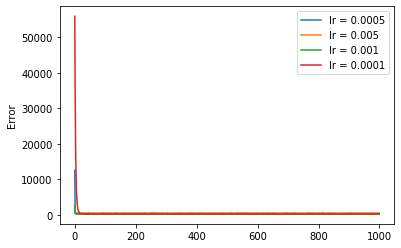

In [11]:
for step in lr_sgd:
    beta_sgd, errors_sgd = stochastic_gd(
        iterations = iterations_sgd, 
        lr = step, 
        x_train = X, 
        y_train = y, 
        beta = b_sgd, 
        tolerance = tolerance_sgd,
        k = k_sgd
    )
    plt.plot(errors_sgd, label = 'lr = ' + str(step))
    plt.legend()
    plt.ylabel('Error')

We can see that the best tested learning rate or step size for the algorithm is **0.0001**. This result still didn't converge in 1,000 iterations but it achieves almost the same error as the closed solution.

## 4. Mini Batch Gradient Descent

### 4.1 Stochastic Gradient Descent Equation

$
\beta_{k+1} = \beta_{k} - \alpha_{k} \nabla f_{i}(\beta_{k})
$

### 4.2 Function

In [52]:
def minibatch_gd(iterations, lr, batch_size, x_train, y_train, beta, tolerance, k):
    
    #Parameters and transformations
    errors = []
    beta = beta.reshape(beta.shape[0],)
    y_train = y_train.reshape(y_train.shape[0],)
    
    #Start of iterations
    for epoch in range(iterations):
        
        for mb in range(int(np.ceil(x_train.shape[0]/batch_size))):
            
            forBatch = (mb * batch_size)

            if mb == int(x_train.shape[0]/batch_size):
                x_mb = x_train[forBatch:x_train.shape[0],:]
                y_mb = y_train[forBatch:x_train.shape[0]]

            else:
                x_mb = x_train[forBatch:(forBatch+batch_size),:]
                y_mb = y_train[forBatch:(forBatch+batch_size)]
            
            
            gradient = 2*(np.matmul(x_mb.T, np.matmul(x_mb, beta) - y_mb)) #x_mb represents the mini batch
            beta = beta - ((lr/x_mb.shape[0]) * gradient)
            
        
        error = np.sum((np.matmul(x_train, beta) - y_train)**2)
        
        #Append the error to the list of errors
        errors.append(error)
        
        #Display only iterations/k errors
        if epoch%k==0:
            print('Iteration', epoch+1, 'step size:', lr, 'error:', error)
        
        if error < tolerance:
            break

    print('Last iteration', epoch+1, 'step size:', lr, 'error:', errors[len(errors)-1])
    return(beta, errors)

In [56]:
beta_mb, error_mb = minibatch_gd(
    iterations = 10, 
    lr = 0.01,
    batch_size = 25,
    x_train = X, 
    y_train = y, 
    beta = b_sgd, 
    tolerance = tolerance_sgd,
    k = 2
)

Iteration 1 step size: 0.01 error: 15141.862369005945
Iteration 3 step size: 0.01 error: 1168.3689359515113
Iteration 5 step size: 0.01 error: 332.4338293498013
Iteration 7 step size: 0.01 error: 247.37382900753653
Iteration 9 step size: 0.01 error: 236.78990362746117
Last iteration 10 step size: 0.01 error: 235.74501281952922
